In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

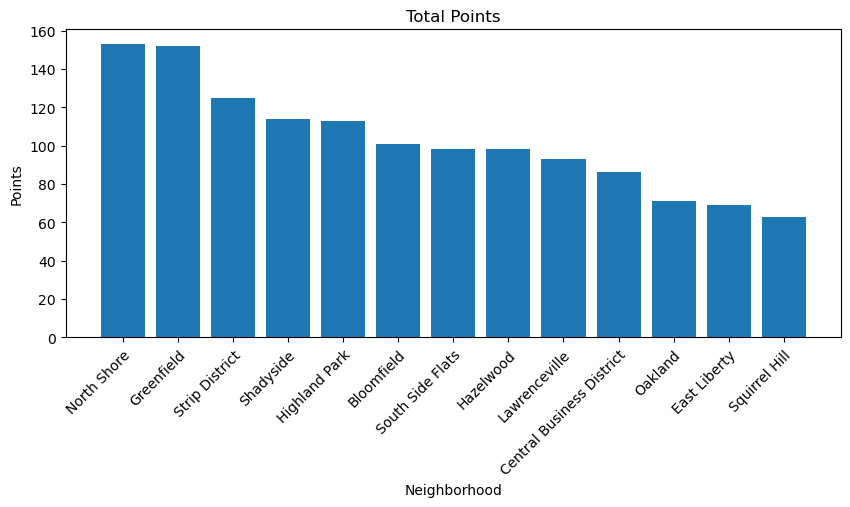

In [4]:
# Load point dataframes from other notebooks
%store -r emspts
%store -r crimepts
%store -r firepts

# Merge all dataframes into one and add all pts
totpts = pd.merge(firepts,emspts,on='neighborhood')
totpts = pd.merge(totpts,crimepts[['neighborhood','crime_total']],on='neighborhood')
totpts['total'] = totpts.drop('neighborhood',axis=1).sum(axis=1)
totpts = totpts.sort_values('total',ascending=False,ignore_index=True)
totpts

hoods = totpts['neighborhood']
counts = totpts['total']

# Plot total points
fig,ax = plt.subplots(figsize=(10, 4))
ax.bar(hoods,counts)
ax.set_xticks(hoods,labels=hoods,rotation=45,rotation_mode='anchor',ha='right')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Points')
ax.set_title('Total Points')
plt.savefig('Figs/totpts.png',bbox_inches='tight')
plt.show()